<a href="https://colab.research.google.com/github/Folia412/Web-2024/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [553]:
df_1= pd.read_csv("avarage_session.csv")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     91 non-null     object
 1   Avarage  92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [554]:
df_1.head()

,Date,Avarage
0,01.04.23,00:03:05
1,02.04.23,00:02:51
2,03.04.23,00:03:28
3,04.04.23,00:03:13
4,05.04.23,00:02:31


In [555]:
df_2 = pd.read_csv("bounce_rate.csv")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    92 non-null     object 
 1   Rate    0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [556]:
df_2.head()

,Date,Rate
0,"01.04.23,""47,55%""",NaN
1,"02.04.23,""48,80%""",NaN
2,"03.04.23,""44,15%""",NaN
3,"04.04.23,""43,52%""",NaN
4,"05.04.23,""50,85%""",NaN


In [557]:
df_3 = pd.read_csv("new_users.csv")
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    91 non-null     object
 1   Count   92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [558]:
df_3.head()

,Date,Count
0,01.04.23,895
1,02.04.23,904
2,03.04.23,1 492
3,04.04.23,1 867
4,05.04.23,3 445


In [559]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df_1['Avarage'] = df_1['Avarage'].apply(time_to_seconds)
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d.%m.%y')
df_1.head()

,Date,Avarage
0,2023-04-01,185
1,2023-04-02,171
2,2023-04-03,208
3,2023-04-04,193
4,2023-04-05,151


In [560]:
df_2[['Date', 'Rate']] = df_2['Date'].str.split(',"', expand=True)
df_2['Rate'] = df_2['Rate'].str.replace('%"', '', regex=False)
df_2['Rate'] = df_2['Rate'].str.replace(',', '.', regex=False)
df_2['Rate'] = df_2['Rate'].astype(float)
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%d.%m.%y')
df_2.head()

,Date,Rate
0,2023-04-01,47.55
1,2023-04-02,48.80
2,2023-04-03,44.15
3,2023-04-04,43.52
4,2023-04-05,50.85


In [561]:
df_3['Date'] = pd.to_datetime(df_3['Date'], format='%d.%m.%y')
df_3['Count']= df_3['Count'].str.replace('\xa0', '', regex=False)
df_3['Count'] = df_3['Count'].astype(float)
df_3.tail()

,Date,Count
87,2023-06-27,2683.0
88,2023-06-28,2206.0
89,2023-06-29,2362.0
90,2023-06-30,2521.0
91,NaT,178416.0


In [562]:
def mov_avg (col2, col1):
    window_size = 7
    moving_avg = col2.rolling(window=window_size).mean()
    moving_std = col2.rolling(window=window_size).std()
    deviation = abs(col2 - moving_avg)/moving_std
    threshold = 2
    anomaly = deviation > threshold

    results_df = pd.DataFrame({
        'timestamp': col1,
        'value': col2,
        'moving_avg': moving_avg,
        'deviation': deviation,
        'anomaly': anomaly
    })

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['timestamp'], results_df['value'], label='Original Data')
    plt.plot(results_df['timestamp'], results_df['moving_avg'], label=f'Moving Average ({window_size} days)')
    plt.scatter(results_df[results_df['anomaly']]['timestamp'], results_df[results_df['anomaly']]['value'], color='red', label='Anomalies')
    plt.title('Anomaly Detection using Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(results_df[results_df['anomaly'] == 1])

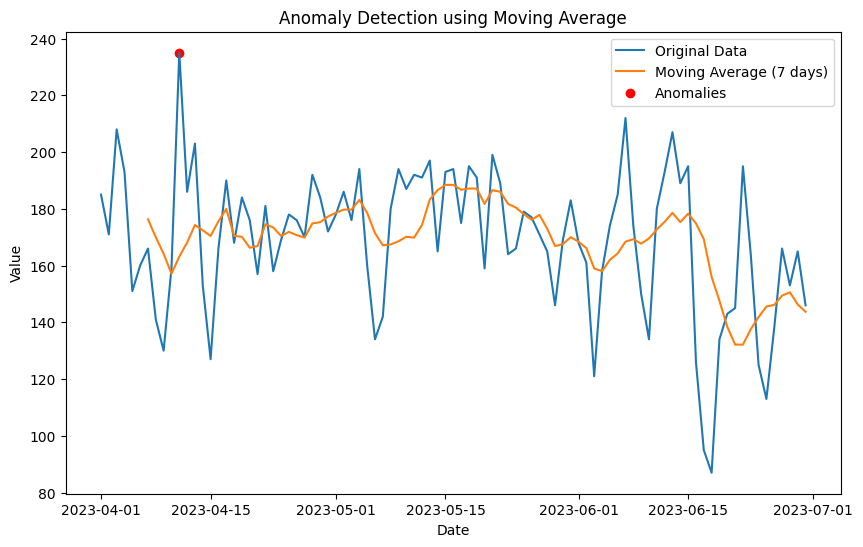

    timestamp  value  moving_avg  deviation  anomaly
10 2023-04-11    235  163.142857    2.11362     True


In [563]:
mov_avg(df_1['Avarage'], df_1['Date'])

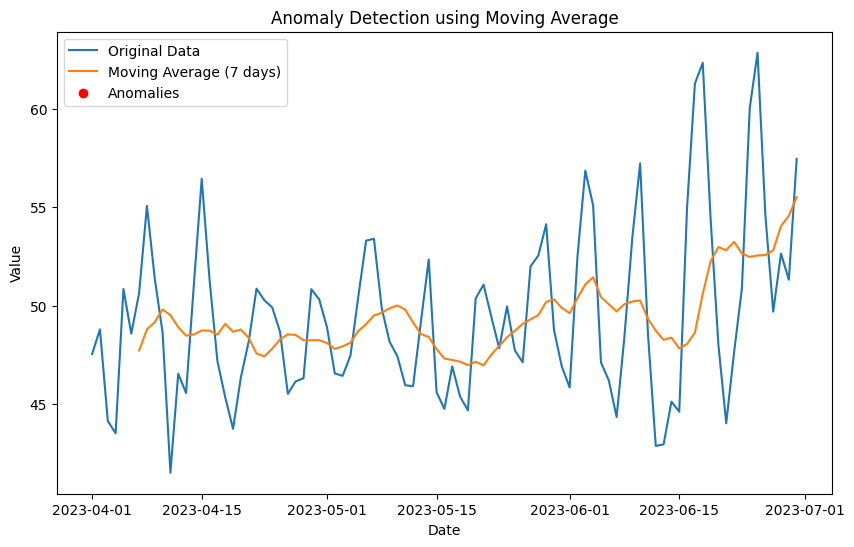

Empty DataFrame
Columns: [timestamp, value, moving_avg, deviation, anomaly]
Index: []


In [564]:
mov_avg(df_2['Rate'], df_2['Date'])

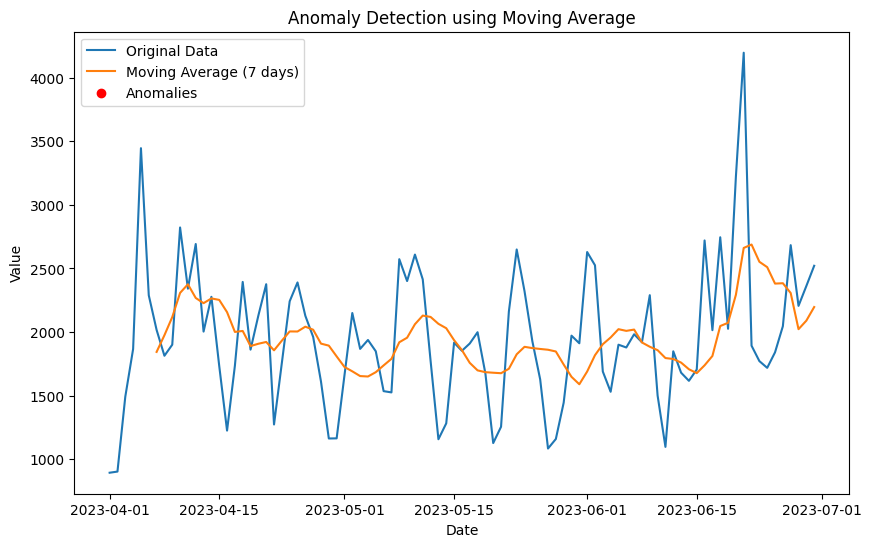

   timestamp     value    moving_avg  deviation  anomaly
91       NaT  178416.0  27439.285714   2.267766     True


In [565]:
mov_avg(df_3['Count'], df_3['Date'])

In [566]:
def z_score (col2, col1):
    window_size = 7
    moving_avg = col2.rolling(window=window_size).mean()
    moving_std = col2.std()
    z_scores = abs(col2 - moving_avg) / moving_std
    threshold = 2
    anomaly = z_scores > threshold

    results_df = pd.DataFrame({
        'timestamp': col1,
        'value': col2,
        'moving_avg': moving_avg,
        'z_scores': z_scores,
        'anomaly': anomaly
    })

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['timestamp'], results_df['value'], label='Original Data')
    plt.plot(results_df['timestamp'], results_df['moving_avg'], label=f'Moving Average ({window_size} days)')
    plt.scatter(results_df[results_df['anomaly'] == 1]['timestamp'], results_df[results_df['anomaly'] == 1]['value'], color='red', label='Anomalies')
    plt.title('Anomaly Detection using Z-Score')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(results_df[results_df['anomaly'] == 1])

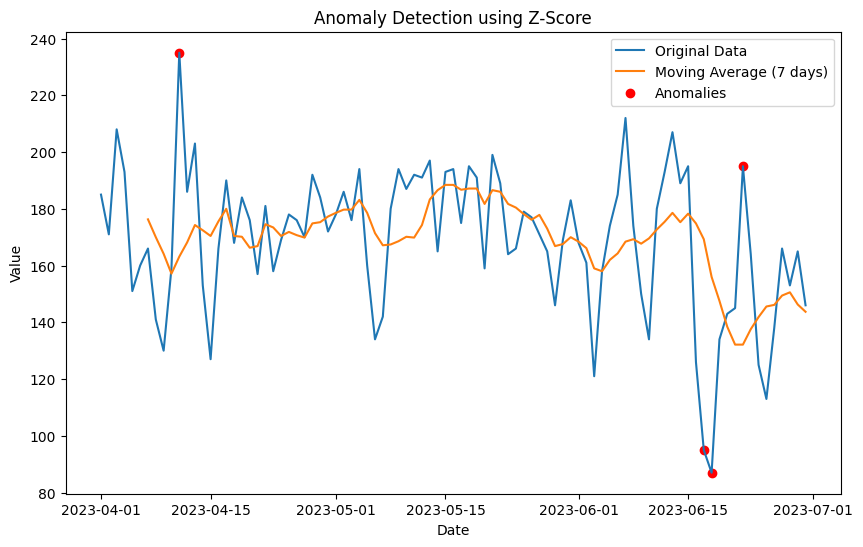

    timestamp  value  moving_avg  z_scores  anomaly
10 2023-04-11    235  163.142857  2.816211     True
77 2023-06-17     95  169.285714  2.911391     True
78 2023-06-18     87  156.000000  2.704234     True
82 2023-06-22    195  132.142857  2.463485     True


In [567]:
z_score(df_1['Avarage'], df_1['Date'])

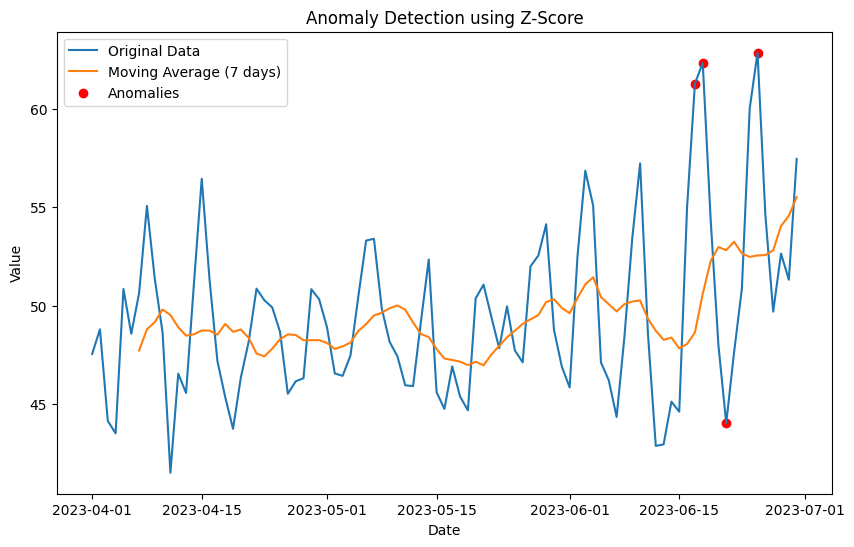

    timestamp  value  moving_avg  z_scores  anomaly
77 2023-06-17  61.28   48.638571  2.889533     True
78 2023-06-18  62.34   50.602857  2.682834     True
81 2023-06-21  44.03   52.822857  2.009840     True
85 2023-06-25  62.85   52.552857  2.353684     True


In [568]:
z_score(df_2['Rate'], df_2['Date'])

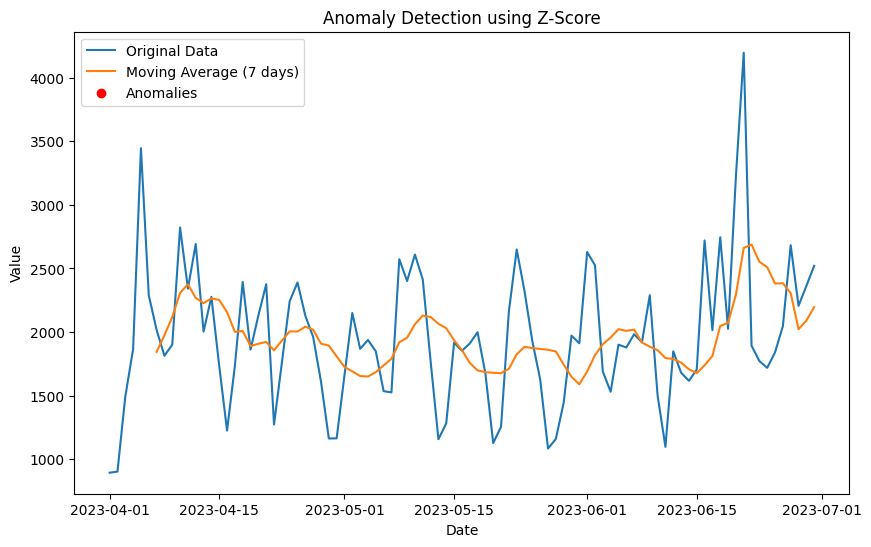

   timestamp     value    moving_avg  z_scores  anomaly
91       NaT  178416.0  27439.285714  8.203049     True


In [569]:
z_score(df_3['Count'], df_3['Date'])

In [570]:
def i_forest (col2, col1):
    X = col2
    X = X.values.reshape(-1, 1)
    isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest.fit(X)
    outliers = isolation_forest.predict(X)
    anomalies = outliers == -1
    anomalies = anomalies.astype(int)
    results_df = pd.DataFrame({
        'timestamp': col1,
        'value': col2,
        'anomaly': anomalies
    })

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['timestamp'], results_df['value'], label='Original Data')
    plt.scatter(results_df[results_df['anomaly'] == 1]['timestamp'], results_df[results_df['anomaly'] == 1]['value'], color='red', label='Anomalies')
    plt.title('Anomaly Detection using Isolation Forest')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(results_df[results_df['anomaly'] == 1])

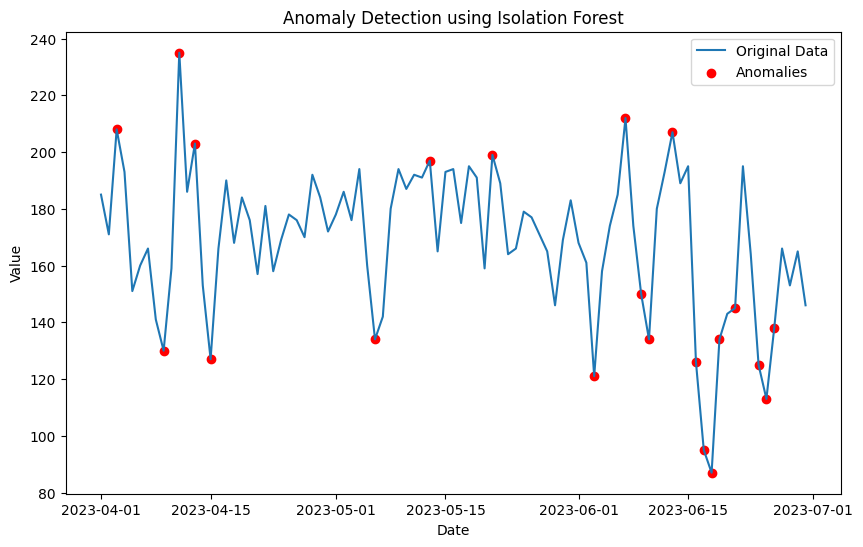

    timestamp  value  anomaly
2  2023-04-03    208        1
8  2023-04-09    130        1
10 2023-04-11    235        1
12 2023-04-13    203        1
14 2023-04-15    127        1
35 2023-05-06    134        1
42 2023-05-13    197        1
50 2023-05-21    199        1
63 2023-06-03    121        1
67 2023-06-07    212        1
69 2023-06-09    150        1
70 2023-06-10    134        1
73 2023-06-13    207        1
76 2023-06-16    126        1
77 2023-06-17     95        1
78 2023-06-18     87        1
79 2023-06-19    134        1
81 2023-06-21    145        1
84 2023-06-24    125        1
85 2023-06-25    113        1
86 2023-06-26    138        1


In [571]:
i_forest(df_1['Avarage'], df_1['Date'])

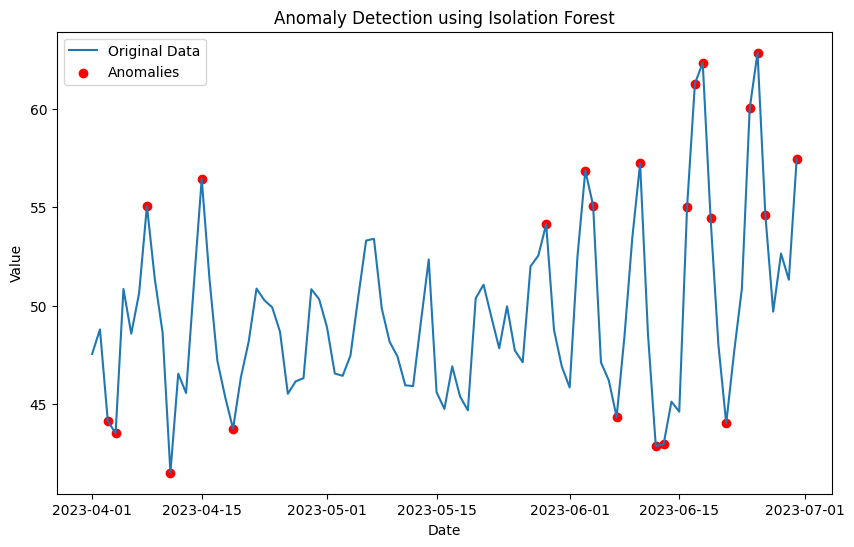

    timestamp  value  anomaly
2  2023-04-03  44.15        1
3  2023-04-04  43.52        1
7  2023-04-08  55.07        1
10 2023-04-11  41.52        1
14 2023-04-15  56.45        1
18 2023-04-19  43.75        1
58 2023-05-29  54.14        1
63 2023-06-03  56.86        1
64 2023-06-04  55.09        1
67 2023-06-07  44.35        1
70 2023-06-10  57.23        1
72 2023-06-12  42.88        1
73 2023-06-13  42.96        1
76 2023-06-16  55.01        1
77 2023-06-17  61.28        1
78 2023-06-18  62.34        1
79 2023-06-19  54.46        1
81 2023-06-21  44.03        1
84 2023-06-24  60.02        1
85 2023-06-25  62.85        1
86 2023-06-26  54.61        1
90 2023-06-30  57.46        1


In [572]:
i_forest(df_2['Rate'], df_2['Date'])

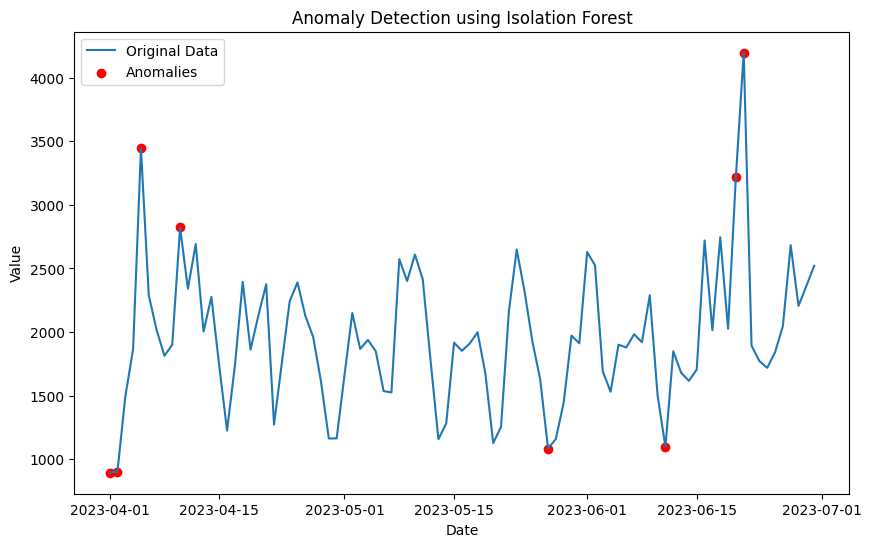

    timestamp     value  anomaly
0  2023-04-01     895.0        1
1  2023-04-02     904.0        1
4  2023-04-05    3445.0        1
9  2023-04-10    2822.0        1
56 2023-05-27    1085.0        1
71 2023-06-11    1098.0        1
80 2023-06-20    3221.0        1
81 2023-06-21    4195.0        1
91        NaT  178416.0        1


In [573]:
i_forest(df_3['Count'], df_3['Date'])

In [574]:
def svm (col2, col1):
    X = col2
    X = X.values.reshape(-1, 1)
    svm = OneClassSVM(nu=0.05)
    svm.fit(X)
    outliers = svm.predict(X)
    anomalies = outliers == -1
    anomalies = anomalies.astype(int)

    results_df = pd.DataFrame({
        'timestamp': col1,
        'value': col2,
        'anomaly': anomalies
    })

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['timestamp'], results_df['value'], label='Original Data')
    plt.scatter(results_df[results_df['anomaly'] == 1]['timestamp'], results_df[results_df['anomaly'] == 1]['value'], color='red', label='Anomalies')
    plt.title('Anomaly Detection using One-Class SVM')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(results_df[results_df['anomaly'] == 1])

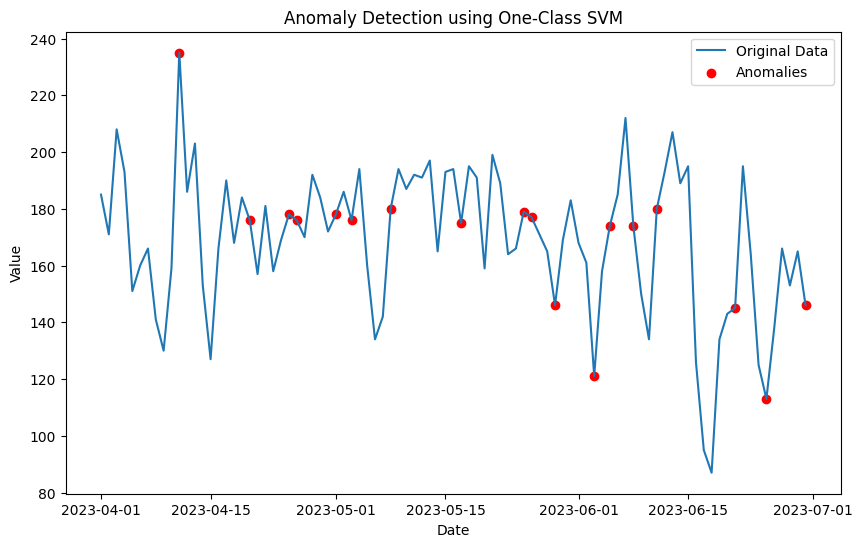

    timestamp  value  anomaly
10 2023-04-11    235        1
19 2023-04-20    176        1
24 2023-04-25    178        1
25 2023-04-26    176        1
30 2023-05-01    178        1
32 2023-05-03    176        1
37 2023-05-08    180        1
46 2023-05-17    175        1
54 2023-05-25    179        1
55 2023-05-26    177        1
58 2023-05-29    146        1
63 2023-06-03    121        1
65 2023-06-05    174        1
68 2023-06-08    174        1
71 2023-06-11    180        1
81 2023-06-21    145        1
85 2023-06-25    113        1
90 2023-06-30    146        1


In [575]:
svm(df_1['Avarage'], df_1['Date'])

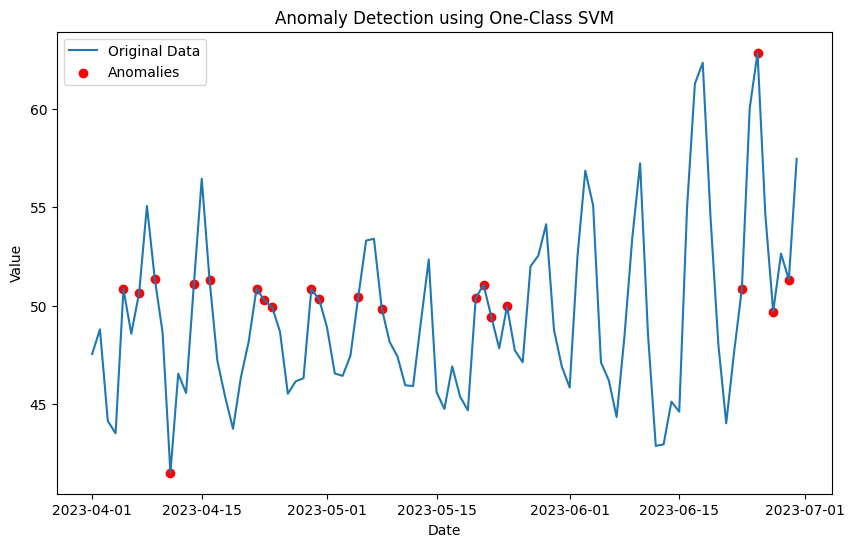

    timestamp  value  anomaly
4  2023-04-05  50.85        1
6  2023-04-07  50.64        1
8  2023-04-09  51.38        1
10 2023-04-11  41.52        1
13 2023-04-14  51.10        1
15 2023-04-16  51.32        1
21 2023-04-22  50.87        1
22 2023-04-23  50.28        1
23 2023-04-24  49.92        1
28 2023-04-29  50.84        1
29 2023-04-30  50.33        1
34 2023-05-05  50.46        1
37 2023-05-08  49.86        1
49 2023-05-20  50.38        1
50 2023-05-21  51.07        1
51 2023-05-22  49.43        1
53 2023-05-24  49.97        1
83 2023-06-23  50.87        1
85 2023-06-25  62.85        1
87 2023-06-27  49.70        1
89 2023-06-29  51.32        1


In [576]:
svm(df_2['Rate'], df_2['Date'])

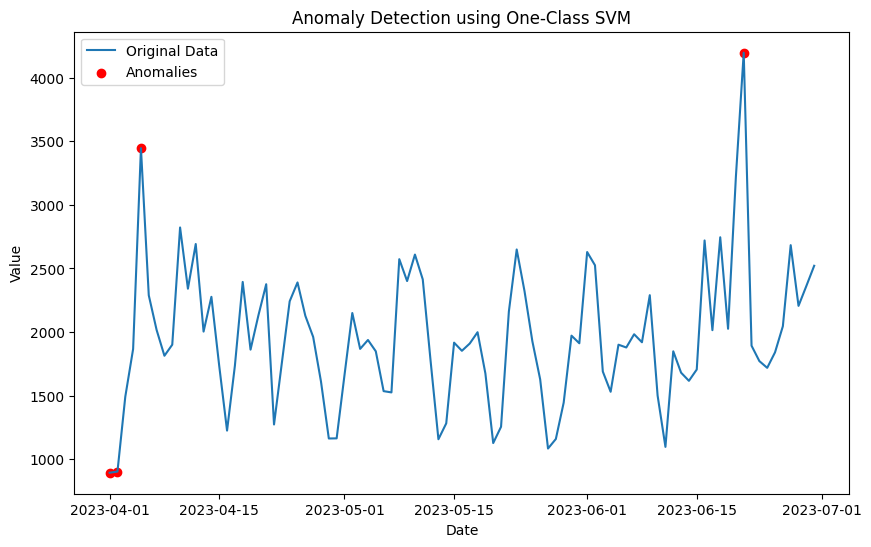

    timestamp     value  anomaly
0  2023-04-01     895.0        1
1  2023-04-02     904.0        1
4  2023-04-05    3445.0        1
81 2023-06-21    4195.0        1
91        NaT  178416.0        1


In [577]:
svm(df_3['Count'], df_3['Date'])